<a href="https://colab.research.google.com/github/Aravindh4404/DATA601UCal/blob/main/docs/introComm/IntroCausalAnalysis_admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/COLLEGE-ACCEPTANCE.jpg" width="500" alt="colab">
</p>


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***

## <font color='darkorange'>Explainability vs Causality</font>


Here we will look at the difference between understanding how the ML model is making predictions (explainability) and what is causing the outcome (causality)

To do so we will look at a university admission example. You have been hired and asked to decided whether there is a gender bias in admission, and if there is reason for legal action against the university.


### <font color='darkorange'>Gender and university admissions</font>


In [21]:
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

Load the data

In [22]:
#load data
df_admit = pd.read_csv("/content/drive/MyDrive/dataDSI/UCB_admission.csv")

#take a look
df_admit.head()

,dept,applicant.gender,admitted,school_score
0,A,male,1,0.494658
1,A,male,1,0.553502
2,A,male,1,0.839305
3,A,male,1,0.805290
4,A,male,1,0.569625


Check for missing data, and the types of data we are dealing with.

In [23]:
df_admit.isna().sum()

,0
dept,0
applicant.gender,0
admitted,0
school_score,0


In [24]:
df_admit.dtypes

,0
dept,object
applicant.gender,object
admitted,int64
school_score,float64


Visualize the data

Let's do some exploratory data analysis before build a model.

<Axes: xlabel='applicant.gender', ylabel='count'>

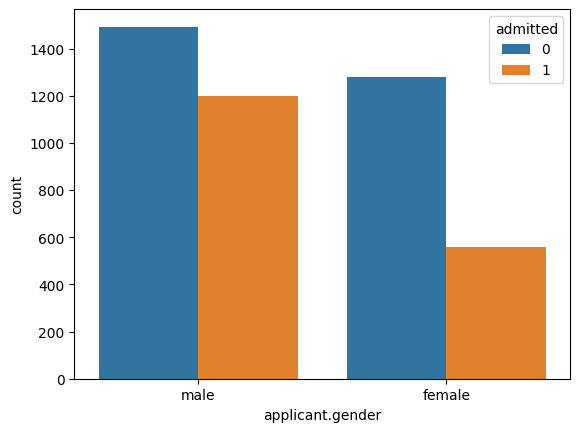

In [25]:
#plot admissions by reported gender
sns.countplot(data=df_admit, x='applicant.gender', hue='admitted')

<Axes: xlabel='dept', ylabel='count'>

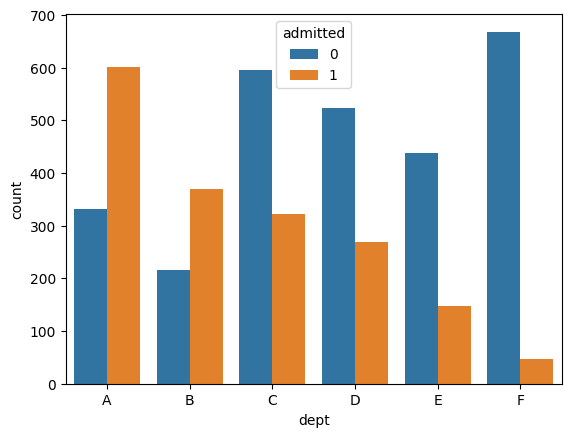

In [26]:
#plot admissions by department
sns.countplot(data=df_admit, x='dept', hue='admitted')

What patterns do you see?

Do these visualizations help you answer if there is systematic bias in acceptance rates by gender?

### <font color='darkorange'>Preprocessing</font>

We have some categorical predictor variables so let's do some preprocessing!

Let's one-hot-encode 'dept'

In [27]:
#convert the categorical variable into dummy variables
df_cat = pd.get_dummies(df_admit['dept'])

#concat the dummy variables back onto the dataframe
df_admit = pd.concat([df_admit, df_cat], axis = 1)

#drop the original categorical variable
df_admit = df_admit.drop(['dept'], axis=1)

#take a look
df_admit

,applicant.gender,admitted,school_score,A,B,C,D,E,F
0,male,1,0.494658,True,False,False,False,False,False
1,male,1,0.553502,True,False,False,False,False,False
2,male,1,0.839305,True,False,False,False,False,False
3,male,1,0.805290,True,False,False,False,False,False
4,male,1,0.569625,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4521,female,0,0.681789,False,False,False,False,False,True
4522,female,0,0.800263,False,False,False,False,False,True
4523,female,0,0.744513,False,False,False,False,False,True
4524,female,0,0.287313,False,False,False,False,False,True


Let's encode the binary predictor variable gender as 0/1

In [28]:
from sklearn.preprocessing import LabelEncoder

#build the encoder
my_gen = LabelEncoder()

#fit and transform the gender column
df_admit['applicant.gender'] = my_gen.fit_transform(df_admit['applicant.gender'].values.reshape(-1,1))

#take a look
df_admit



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,applicant.gender,admitted,school_score,A,B,C,D,E,F
0,1,1,0.494658,True,False,False,False,False,False
1,1,1,0.553502,True,False,False,False,False,False
2,1,1,0.839305,True,False,False,False,False,False
3,1,1,0.805290,True,False,False,False,False,False
4,1,1,0.569625,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4521,0,0,0.681789,False,False,False,False,False,True
4522,0,0,0.800263,False,False,False,False,False,True
4523,0,0,0.744513,False,False,False,False,False,True
4524,0,0,0.287313,False,False,False,False,False,True


Finally, let's do a training testing split on the data.

In [29]:
#split data into predictors (X) and target (y)
X = df_admit.drop('admitted', axis=1)
y = df_admit['admitted']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=234)

### <font color='darkorange'>Build a model</font>

Can we predict admission based on reported gender?

Build a random forest for predicting admission using gender.

In [30]:
from sklearn.ensemble import RandomForestClassifier

#1. Build the model
forest_classifier = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features=0.8, max_samples=0.8, max_depth=5,random_state=243)

#2. Fit the model to the data
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.8, max_samples=0.8,
                       random_state=243)

Let's see what variables the model learnt were important for predicting if someone will be admitted.

In [31]:
from sklearn.inspection import permutation_importance

#model interpretation
rel_impo = permutation_importance(forest_classifier, X_test, y_test,n_repeats=30,random_state=243)

#build a dataframe to store the results
df_rel_impo = pd.DataFrame({"feature":X_test.columns,"importance":rel_impo.importances_mean, "sd":rel_impo.importances_std})

#take a look
df_rel_impo.sort_values(by='importance', ascending=False,inplace=True)

df_rel_impo

,feature,importance,sd
2,A,0.068727,0.011513
3,B,0.056549,0.008874
7,F,0.013061,0.006398
0,applicant.gender,0.001987,0.001519
6,E,0.000442,0.001442
5,D,0.000147,0.000375
1,school_score,0.000000,0.000285
4,C,0.000000,0.000000


Let's also plot the permutation feature importance

<Axes: xlabel='importance', ylabel='feature'>

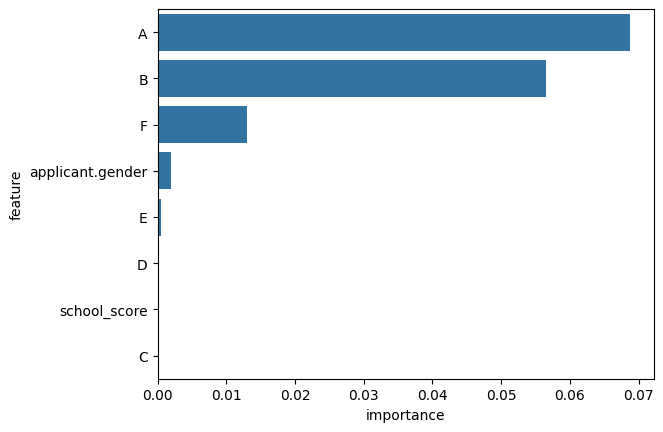

In [32]:
sns.barplot(data=df_rel_impo, y='feature', x='importance')


Finally, let's ask our model to do some counterfactual. These are "what-if" questions that we can use to see what would have happened if an applicant would be admitted base on if they reported a different gender.

In [42]:
# 1. Create a dataframe for the conterfactual you want to test
df_question = pd.DataFrame({
    'applicant.gender': [0, 1],
    'school_score': [50, 50],
    'A': [0, 0],
    'B': [0, 0],
    'C': [0, 0],
    'D': [0, 0],
    'E': [0, 0],
    'F': [1, 1],
})

# 2. Use the model to get probabilities
question_pred_proba = forest_classifier.predict_proba(df_question)

# 3. Wrap into a DataFrame for readability
proba_df = pd.DataFrame(
    question_pred_proba,
    columns=forest_classifier.classes_,
    index=['Female', 'Male']
)

print(proba_df)


               0         1
Female  0.846344  0.153656
Male    0.922448  0.077552


What is the model telling us when it comes to the impact that gender has on if someone will be admitted to UC Berkeley?

### <font color='darkorange'>Fit the model again, this time with a reduced model</font>

To highlight how our model changes interpretation base on what variables we include, let's fit the model again... this time without accounting for department.

Let's remove department.

In [34]:
#fit a smaller model - remove departments
X_train_small = X_train.drop(["A","B","C","D","E","F"], axis=1)

X_test_small = X_test.drop(["A","B","C","D","E","F"], axis=1)

Let's fit a new random forest model.

In [35]:
#1. Build the model
forest_classifier_small = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features=0.8, max_samples=0.8, max_depth=5,random_state=243)

#2. Fit the model to the data
forest_classifier_small.fit(X_train_small, y_train)

RandomForestClassifier(max_depth=5, max_features=0.8, max_samples=0.8,
                       random_state=243)

Let's calculate permutation feature importance.

In [36]:
#model interpretation
rel_impo_small = permutation_importance(forest_classifier_small, X_test_small, y_test,n_repeats=30,random_state=243)

#build a dataframe to store the results
df_rel_impo_small = pd.DataFrame({"feature":X_test_small.columns,"importance":rel_impo_small.importances_mean, "sd":rel_impo_small.importances_std})

#take a look
df_rel_impo_small.sort_values(by='importance', ascending=False,inplace=True)

df_rel_impo_small

,feature,importance,sd
0,applicant.gender,0.004636,0.003127
1,school_score,0.002649,0.005427


<Axes: xlabel='importance', ylabel='feature'>

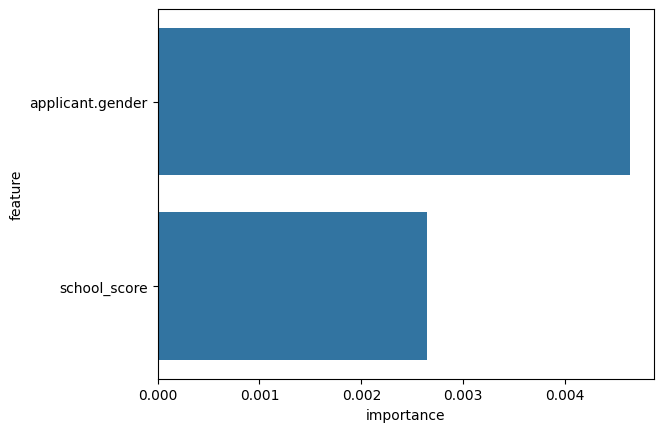

In [37]:
sns.barplot(data=df_rel_impo_small, y='feature', x='importance')

Then let's ask the model a counterfactual question about how gender might impact admissions.

In [38]:
# 1. dataframe for the scenarios you want to test
df_question = pd.DataFrame({
    'applicant.gender': [0, 1],
    'school_score': [0, 0]
})

# 2. get probabilities
question_pred_proba = forest_classifier_small.predict_proba(df_question)

# 3. take a look
proba_df = pd.DataFrame(
    question_pred_proba,
    columns=forest_classifier.classes_,
    index=['Female', 'Male']
)

print(proba_df)

               0         1
Female  0.588229  0.411771
Male    0.534313  0.465687


You should see that now the model predicts quite a bit of difference. Which one is right?

The answer is both!

It's just that each model is telling us something different. By containing different predictor variables, the models are addressing a different question.

### <font color='darkorange'>Statistical confounds</font>

> Statistical confounds make it hard to determine the causal nature of the patterns we find in ML model results. This is the case with traditional statistical models as well! We need to be careful about how we explain how a model makes predictions and the causal nature of those patterns.

> In the case of the admissions and gender, there is a process where genders are not applying to departments in equal measure.

That is, the causal relationships that generated this data might look something like:

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/DAG_admission.png" width="600" alt="colab">
</p>

The model with all the predictors in, is estimating the bottom line going from Gender to Admission. That is called the "direct effect" of Gender.

While the model without Department is estimating the lines going from Gender to Department then to Admission, and the line going from Gender to admission. This is called the "total effect" of Gender.

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Try going back and changing/removing the fixed random state, do you get the same answer each time.

Also, school score is just a random number! I added it in as a way for you to double check if your model is overfitting. See if you can build random forest models that correctly give zero weight to school score, and yet still pull out the impacts of gender and department.

### <font color='darkorange'>Feature selection by performance</font>

What happens if we use recursive feature extraction to automatically choose parameters for us?

In [43]:
from sklearn.feature_selection import RFECV

#min number of variables/features
min_features_to_select = 1

#build the feature selection algorithm
rfecv = RFECV(estimator=forest_classifier, step=1, cv=5, min_features_to_select=min_features_to_select)

#fit the algorithm to the data
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


Let's take a look at a plot

Text(0.5, 1.0, 'Recursive Feature Elimination with Cross-Validation (RFECV)')

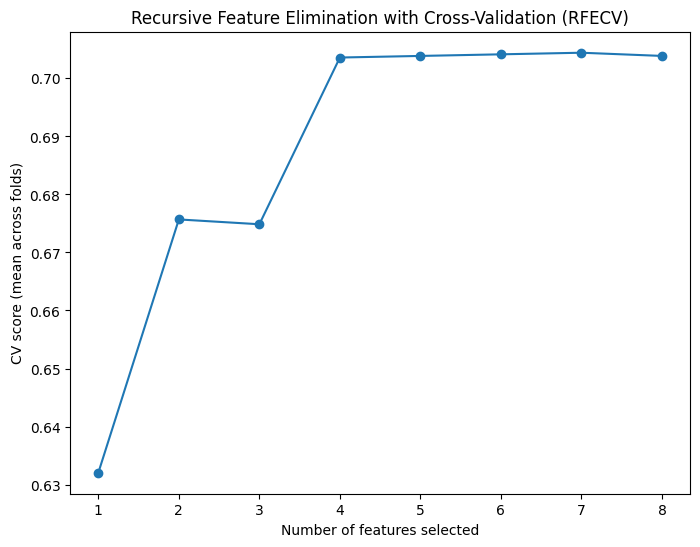

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Number of features tested
n_features = range(
    rfecv.min_features_to_select,
    len(rfecv.cv_results_["mean_test_score"]) + rfecv.min_features_to_select
)

# Plot the scores
plt.figure(figsize=(8,6))
plt.plot(n_features, rfecv.cv_results_["mean_test_score"], marker="o")
plt.xlabel("Number of features selected")
plt.ylabel("CV score (mean across folds)")
plt.title("Recursive Feature Elimination with Cross-Validation (RFECV)")



In [44]:
selected_features = X_train.columns[rfecv.support_]
print("Selected features:", list(selected_features))


Selected features: ['applicant.gender', 'school_score', 'A', 'B', 'C', 'E', 'F']


What did the feature selector suggest is the "best" features to include?
* Does this model help you answer the question about if one gender is more likely to be admitted to UC Berkeley?

#### <font color='darkorange'>Bonus</font>

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Redo the exercise above this time using decision trees, or linear regression.

In [41]:
from sklearn.linear_model import LinearRegression

# build
LR1 = LinearRegression()

# fit
LR1.fit(X_train, y_train)

LinearRegression()

### <font color='darkorange'>Further reading</font>

If you would like to know more about causal inference you might like:

> The book of why ([link](http://repo.darmajaya.ac.id/4847/1/The%20book%20of%20why_%20the%20new%20science%20of%20cause%20and%20effect%20%28%20PDFDrive%20%29.pdf))

> Causal Inference and Discovery in Python ([link](https://github.com/PacktPublishing/Causal-Inference-and-Discovery-in-Python))

> If you would like the notebook without missing code check out the [full code](https://colab.research.google.com/github/tbonne/peds/blob/main/docs/fullNotebooks/full_IntroCausalAnalysis.ipynb) version.